In [1]:
!pip install -U albumentations
!pip install gitpython

     |████████████████████████████████| 102 kB 4.8 MB/s 
     |████████████████████████████████| 47.6 MB 1.5 MB/s 
  Attempting uninstall: albumentations
    Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12
     |████████████████████████████████| 180 kB 5.2 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 


In [13]:
import git
import os
import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2
import cv2

In [ ]:
os.chdir("/content/")

In [ ]:
# if os.path.isdir("/content/Transformer-DeepLearning"):
#   !rm -rf "/content/Transformer-DeepLearning"

In [ ]:
# !git clone https://github.com/amitkml/Transformer-DeepLearning 

In [ ]:
# os.chdir("/content/Transformer-DeepLearning/ConvModelAdvancedTraining/models")
# import resnet as resnet
# import resnet_ln as resnet_ln

In [3]:
!pip install torchsummary
from torchsummary import summary

## resnet.py

In [4]:
'''ResNet in PyTorch.
For Pre-activation ResNet, see 'preact_resnet.py'.
Reference:
[1] Kaiming He, Xiangyu Zhang, Shaoqing Ren, Jian Sun
    Deep Residual Learning for Image Recognition. arXiv:1512.03385
'''
import torch
import torch.nn as nn
import torch.nn.functional as F


class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, in_planes, planes, stride=1):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(
            in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3,
                               stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != self.expansion*planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, self.expansion*planes,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion*planes)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out


# class Bottleneck(nn.Module):
#     expansion = 4

#     def __init__(self, in_planes, planes, stride=1):
#         super(Bottleneck, self).__init__()
#         self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=1, bias=False)
#         self.bn1 = nn.BatchNorm2d(planes)
#         self.conv2 = nn.Conv2d(planes, planes, kernel_size=3,
#                                stride=stride, padding=1, bias=False)
#         self.bn2 = nn.BatchNorm2d(planes)
#         self.conv3 = nn.Conv2d(planes, self.expansion *
#                                planes, kernel_size=1, bias=False)
#         self.bn3 = nn.BatchNorm2d(self.expansion*planes)

#         self.shortcut = nn.Sequential()
#         if stride != 1 or in_planes != self.expansion*planes:
#             self.shortcut = nn.Sequential(
#                 nn.Conv2d(in_planes, self.expansion*planes,
#                           kernel_size=1, stride=stride, bias=False),
#                 nn.BatchNorm2d(self.expansion*planes)
#             )

#     def forward(self, x):
#         out = F.relu(self.bn1(self.conv1(x)))
#         out = F.relu(self.bn2(self.conv2(out)))
#         out = self.bn3(self.conv3(out))
#         out += self.shortcut(x)
#         out = F.relu(out)
#         return out


class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=10):
        super(ResNet, self).__init__()
        self.in_planes = 64

        self.conv1 = nn.Conv2d(3, 64, kernel_size=3,
                               stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2)
        self.layer4 = self._make_layer(block, 512, num_blocks[3], stride=2)
        self.linear = nn.Linear(512*block.expansion, num_classes)

    def _make_layer(self, block, planes, num_blocks, stride):
        strides = [stride] + [1]*(num_blocks-1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_planes, planes, stride))
            self.in_planes = planes * block.expansion
        return nn.Sequential(*layers)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = F.avg_pool2d(out, 4)
        out = out.view(out.size(0), -1)
        out = self.linear(out)
        return out


def ResNet18():
    return ResNet(BasicBlock, [2, 2, 2, 2])


def ResNet34():
    return ResNet(BasicBlock, [3, 4, 6, 3])


# def ResNet50():
#     return ResNet(Bottleneck, [3, 4, 6, 3])


# def ResNet101():
#     return ResNet(Bottleneck, [3, 4, 23, 3])


# def ResNet152():
#     return ResNet(Bottleneck, [3, 8, 36, 3])


def test():
    net = ResNet18()
    y = net(torch.randn(1, 3, 32, 32))
    print(y.size())

# test()

## Custom resnet

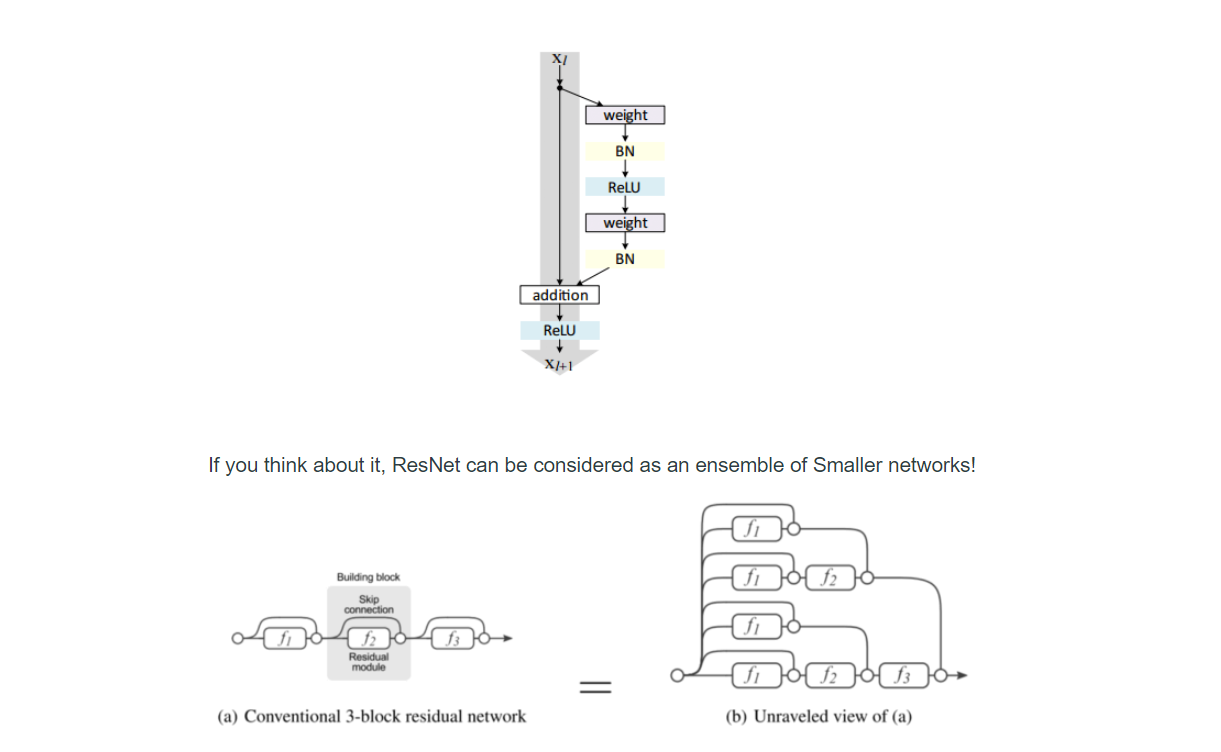

In [4]:
'''ResNet in PyTorch.
For Pre-activation ResNet, see 'preact_resnet.py'.
Reference:
[1] Kaiming He, Xiangyu Zhang, Shaoqing Ren, Jian Sun
    Deep Residual Learning for Image Recognition. arXiv:1512.03385
'''
import torch
import torch.nn as nn
import torch.nn.functional as F


# class BasicBlock(nn.Module):
#     def __init__(self, in_planes, planes, stride=1):
#         super(BasicBlock, self).__init__()
#         self.conv1 = nn.Conv2d(
#             in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
#         self.bn1 = nn.BatchNorm2d(planes)
#         self.conv2 = nn.Conv2d(planes, planes, kernel_size=3,
#                                stride=1, padding=1, bias=False)
#         self.bn2 = nn.BatchNorm2d(planes)
#         self.relu = nn.ReLU()

#     def forward(self, x):
#         out = self.relu(self.bn1(self.conv1(x)))
#         out = self.relu(self.bn2(self.conv2(out)))
#         return out


# class CustomResNet(nn.Module):
#     def __init__(self, block, num_classes=10, dropout=0.01):
#         super(CustomResNet, self).__init__()

#         ## Convolution Block1
#         self.prepblock = nn.Sequential(
#             nn.Conv2d(3, 64, 3, padding=1, bias = False),
#             nn.BatchNorm2d(64),
#             nn.ReLU()
#         )
#         ## Convolution layer1
#         self.convlayer1 = nn.Sequential(
#             nn.Conv2d(64, 128, 3, padding=1, bias = False),  
#             nn.MaxPool2d(2,2),
#             nn.BatchNorm2d(128),
#             nn.ReLU()            
#             # nn.Dropout2d(dropout)
#         )
#         self.resblock1 = block(128,128,1) ## ResBlock( (Conv-BN-ReLU-Conv-BN-ReLU))(X) [128k] 
        
#         ## Convolution layer2
#         self.convlayer2 = nn.Sequential(
#             nn.Conv2d(128, 256, 3, padding=1, bias = False),  
#             nn.MaxPool2d(2,2),
#             nn.BatchNorm2d(256),
#             nn.ReLU()           
#             # nn.Dropout2d(dropout)
#         )
        
#         ## Convolution layer3
#         self.convlayer3 = nn.Sequential(
#             nn.Conv2d(256, 512, 3, padding=1, bias = False),  
#             nn.MaxPool2d(2,2),
#             nn.BatchNorm2d(512),
#             nn.ReLU()           
#             # nn.Dropout2d(dropout)
#         )
#         self.resblock2 = block(512,512,1) ## ResBlock( (Conv-BN-ReLU-Conv-BN-ReLU))(X) [512k]

#         self.pool = nn.MaxPool2d(4, 4)

#         self.linear = nn.Linear(512, 10,bias=False)

#     def forward(self, x):
#       # Prep Layer
#         out = self.prepblock(x)
        
#         out = self.convlayer1(out)
#         res1 = self.resblock1(out)
#         out = out + res1
        
#         out = self.convlayer2(out)

#         out = self.convlayer3(out)
#         res2 = self.resblock2(out)
#         out = out + res2
        
#         out = self.pool(out)
        
#         out = out.view(out.size(0), -1)
#         out = self.linear(out)
#         return out


# def ResNetCustom():
#     return CustomResNet(BasicBlock)


# # def ResNet50():
# #     return ResNet(Bottleneck, [3, 4, 6, 3])


# # def ResNet101():
# #     return ResNet(Bottleneck, [3, 4, 23, 3])


# # def ResNet152():
# #     return ResNet(Bottleneck, [3, 8, 36, 3])

class BasicBlock(nn.Module):

    def __init__(self, in_planes, planes, stride=1):
        super(BasicBlock, self).__init__()

        self.conv1 = nn.Conv2d(
            in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3,
                               stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)
        self.relu = nn.ReLU()

    def forward(self, x):
        out = self.relu(self.bn1(self.conv1(x)))
        out = self.relu(self.bn2(self.conv2(out)))
        return out
        
class CustomResNet(nn.Module):
    def __init__(self, block,   dropout= 0.05, num_classes=10):
        super(CustomResNet, self).__init__()
        
        self.prep_layer = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(),
        )
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1, bias=False),
            nn.MaxPool2d(2,2),
            nn.BatchNorm2d(128),
            nn.ReLU()
            )
            
        self.resblock1 = block(128, 128, stride=1)

        self.dp1 = nn.Dropout2d(dropout)
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1, bias=False),
            nn.MaxPool2d(2,2),
            nn.BatchNorm2d(256),
            nn.ReLU()
            )
            
        self.layer3 = nn.Sequential(
            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1, bias=False),
            nn.MaxPool2d(2,2),
            nn.BatchNorm2d(512),
            nn.ReLU()
            )
        self.resblock2 = block(512, 512, stride=1)
        self.dp2 = nn.Dropout2d(dropout)

        self.pool = nn.MaxPool2d(4, 4)
        self.linear = nn.Linear(512, 10,bias=False)
        

    def forward(self, x):
        # Prep Layer
        out = self.prep_layer(x)
        
        out = self.layer1(out)
        out = self.dp1(out)

        res1 = self.resblock1(out)
        out = out + res1

        

        out = self.layer2(out)
        out = self.dp1(out)
        
        out = self.layer3(out)
        out = self.dp2(out)

        res2 = self.resblock2(out)
        out = out + res2
        
        

        out = self.pool(out)
        
        out = out.view(out.size(0), -1)
        out = self.linear(out)
        return out

def testResNetCustom():
    net = CustomResNet()
    y = net(torch.randn(1, 3, 32, 32))
    print(y.size())

def ResNetCustom():
    return CustomResNet(BasicBlock)

# test()

## main.py

In [5]:
'''Train CIFAR10 with PyTorch.'''
import argparse
import os

import torch
import torch.backends.cudnn as cudnn
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
# from utils import progress_bar
from tqdm import tqdm
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.optim.lr_scheduler import StepLR,OneCycleLR
# from models import *
# from utils import *
# from gradcam import *

os.system('pip install -U albumentations')

import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2

best_acc = 0  # best test accuracy
start_epoch = 0  # start from epoch 0 or last checkpoint epoch

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def run_experiments(lr = 0.1, resume = '', description = 'PyTorchCIFAR10Training', epoch =40, lr_scheduler='ReduceLROnPlateau'):
  
 # https://stackoverflow.com/questions/45823991/argparse-in-ipython-notebook-unrecognized-arguments-f
#   parser = argparse.ArgumentParser()
#   parser = argparse.ArgumentParser(description='PyTorch CIFAR10 Training')
  lr = lr
  resume = resume
  epoch = epoch
#   args = parser.parse_args(args=['--lr', lr, '--resume', 'store_true'])
  use_cuda = torch.cuda.is_available()
  device = torch.device("cuda" if use_cuda else "cpu")
#   best_acc = 0  # best test accuracy
  start_epoch = 0
  print("Got all parser argument")
  # Data
  print('================================================> Preparing data................')
  
  mean,std = get_mean_and_std()

  train_transforms, test_transforms = data_albumentations(mean, std)
  
  transform_train = transforms.Compose([
      transforms.RandomCrop(32, padding=4),
      transforms.RandomHorizontalFlip(),
      transforms.ToTensor(),
      transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
    ])

  transform_test = transforms.Compose([
      transforms.ToTensor(),
      transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
  ])

  trainset = torchvision.datasets.CIFAR10(
  root='./data', train=True, download=True, transform=train_transforms)
  trainloader = torch.utils.data.DataLoader(
      trainset, batch_size=128, shuffle=True, num_workers=2)

  testset = torchvision.datasets.CIFAR10(
      root='./data', train=False, download=True, transform=test_transforms)
  testloader = torch.utils.data.DataLoader(  
      testset, batch_size=100, shuffle=False, num_workers=2)
  

  classes = ('plane', 'car', 'bird', 'cat', 'deer',
             'dog', 'frog', 'horse', 'ship', 'truck')

# Model
  print('===========================================================> Building model...............')
  train_losses = []
  test_losses = []
  train_accuracy = []
  test_accuracy = []
  
# net = VGG('VGG19')
  net = ResNet18()
  net = net.to(device)
  
  model_summary(net, device, input_size=(3, 32, 32))
  
  print('/n ================================================================================================== /n')
  print('/n ================================================================================================== /n')    
  exp_metrics={}
  if device == 'cuda':
      net = torch.nn.DataParallel(net)
      cudnn.benchmark = True

  if resume:
    # Load checkpoint.
    print('==> Resuming from checkpoint..')
    assert os.path.isdir('checkpoint'), 'Error: no checkpoint directory found!'
    checkpoint = torch.load('./checkpoint/ckpt.pth')
    net.load_state_dict(checkpoint['net'])
    best_acc = checkpoint['acc']
    start_epoch = checkpoint['epoch']

  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(net.parameters(), lr=lr,
                        momentum=0.9, weight_decay=5e-4)
  # x = 2 if i > 100 else 1 if i < 100 else 0
  scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=200) if lr_scheduler == 'CosineAnnealingLR' else ReduceLROnPlateau(optimizer, mode='max', factor=0.1, patience=0, verbose=True) if  lr_scheduler == 'ReduceLROnPlateau' else OneCycleLR(optimizer, max_lr=lr,epochs=epoch,steps_per_epoch=len(trainloader))
  # scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=200)
  for epoch in range(start_epoch, start_epoch+epoch):
      train(epoch, net, optimizer, trainloader, device, criterion, train_losses, train_accuracy)
      test(epoch, net, optimizer, testloader, device, criterion, test_losses, test_accuracy)
      scheduler.step(test_accuracy[-1])
  print('============================================================ Training and Testing Performance ================================')
  print('===========================================================================================================================')  
  exp_metrics[description] = (train_accuracy,train_losses,test_accuracy,test_losses)
  plot_metrics(exp_metrics[description])
  
  print('============================================================= Class Level Accuracy ==========================================')
  print('============================================================================================================================= ')  
  class_level_accuracy(net, testloader, device)
  
  print('============================================== Random Misclassified Images ==================================================')
  wrong_images = wrong_predictions(testloader, use_cuda, net)
  print('=============================================================================================================================')  
  
  print('============================================== Grdadcam Misclassified Images ==================================================')

  classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
  target_layers = ["layer1","layer2","layer3","layer4"]
  gradcam_output, probs, predicted_classes = generate_gradcam(wrong_images[:20], net, target_layers,device)
  plot_gradcam(gradcam_output, target_layers, classes, (3, 32, 32),predicted_classes, wrong_images[:20])
  print('=============================================================================================================================')  


def run_experiments_ln(lr = 0.1, resume = '', description = 'PyTorchCIFAR10Training', epoch =40, lr_scheduler='ReduceLROnPlateau'):
      
 # https://stackoverflow.com/questions/45823991/argparse-in-ipython-notebook-unrecognized-arguments-f
#   parser = argparse.ArgumentParser()
#   parser = argparse.ArgumentParser(description='PyTorch CIFAR10 Training')
  lr = lr
  resume = resume
  epoch = epoch
#   args = parser.parse_args(args=['--lr', lr, '--resume', 'store_true'])
  use_cuda = torch.cuda.is_available()
  device = torch.device("cuda" if use_cuda else "cpu")
#   best_acc = 0  # best test accuracy
  start_epoch = 0
  print("Got all parser argument and starting Training resnet with layer norm")
  # Data
  print('================================================> Preparing data................')
  
  mean,std = get_mean_and_std()

  train_transforms, test_transforms = data_albumentations(mean, std)
  
  transform_train = transforms.Compose([
      transforms.RandomCrop(32, padding=4),
      transforms.RandomHorizontalFlip(),
      transforms.ToTensor(),
      transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
    ])

  transform_test = transforms.Compose([
      transforms.ToTensor(),
      transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
  ])

  trainset = torchvision.datasets.CIFAR10(
  root='./data', train=True, download=True, transform=train_transforms)
  trainloader = torch.utils.data.DataLoader(
      trainset, batch_size=128, shuffle=True, num_workers=2)

  testset = torchvision.datasets.CIFAR10(
      root='./data', train=False, download=True, transform=test_transforms)
  testloader = torch.utils.data.DataLoader(  
      testset, batch_size=100, shuffle=False, num_workers=2)
  

  classes = ('plane', 'car', 'bird', 'cat', 'deer',
             'dog', 'frog', 'horse', 'ship', 'truck')

# Model
  print('===========================================================> Building model...............')
  train_losses = []
  test_losses = []
  train_accuracy = []
  test_accuracy = []
  
# net = VGG('VGG19')
  net = LResNet18()
  net = net.to(device)
  
  model_summary(net, device, input_size=(3, 32, 32))
  
  print('/n ================================================================================================== /n')
  print('/n ================================================================================================== /n')    
  exp_metrics={}
  if device == 'cuda':
      net = torch.nn.DataParallel(net)
      cudnn.benchmark = True

  if resume:
    # Load checkpoint.
    print('==> Resuming from checkpoint..')
    assert os.path.isdir('checkpoint'), 'Error: no checkpoint directory found!'
    checkpoint = torch.load('./checkpoint/ckpt.pth')
    net.load_state_dict(checkpoint['net'])
    best_acc = checkpoint['acc']
    start_epoch = checkpoint['epoch']

  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(net.parameters(), lr=lr,
                        momentum=0.9, weight_decay=5e-4)
  # x = 2 if i > 100 else 1 if i < 100 else 0
  scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=200) if lr_scheduler == 'CosineAnnealingLR' else ReduceLROnPlateau(optimizer, mode='max', factor=0.1, patience=0, verbose=True) if  lr_scheduler == 'ReduceLROnPlateau' else OneCycleLR(optimizer, max_lr=lr,epochs=epoch,steps_per_epoch=len(trainloader))
  # scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=200)
  for epoch in range(start_epoch, start_epoch+epoch):
      train(epoch, net, optimizer, trainloader, device, criterion, train_losses, train_accuracy)
      test(epoch, net, optimizer, testloader, device, criterion, test_losses, test_accuracy)
      scheduler.step(test_accuracy[-1])
  print('============================================================ Training and Testing Performance ================================')
  print('===========================================================================================================================')  
  exp_metrics[description] = (train_accuracy,train_losses,test_accuracy,test_losses)
  plot_metrics(exp_metrics[description])
  
  print('============================================================= Class Level Accuracy ==========================================')
  print('============================================================================================================================= ')  
  class_level_accuracy(net, testloader, device)
  
  print('============================================== Random Misclassified Images ==================================================')
  wrong_images = wrong_predictions(testloader, use_cuda, net)
  print('=============================================================================================================================')  
  
  print('============================================== Grdadcam Misclassified Images ==================================================')

  classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
  target_layers = ["layer1","layer2","layer3","layer4"]
  gradcam_output, probs, predicted_classes = generate_gradcam(wrong_images[:20], net, target_layers,device)
  plot_gradcam(gradcam_output, target_layers, classes, (3, 32, 32),predicted_classes, wrong_images[:20])
  print('=============================================================================================================================')  


def train(epoch, model, optimizer, trainloader, device, criterion, train_losses, train_accuracy):
    criterion = criterion
    device = device
    trainloader = trainloader
    optimizer = optimizer
    net = model
    print('\nEpoch: %d' % epoch)
    net.train()
    # train_loss = 0
    correct = 0
    total = 0
    processed = 0
    lrs=[]
    
    pbar = tqdm(trainloader)
    
    for batch_idx, (inputs, targets) in enumerate(pbar):
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        # train_loss += loss.item()
        train_losses.append(loss.data.cpu().numpy().item())
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()
        processed += len(inputs)
        lrs.append(get_lr(optimizer))
        
        # pbar.set_description(desc= f'Loss={loss.item()} Batch_id={batch_idx} LR={get_lr(optimizer):0.5f} Accuracy={100*correct/processed:0.2f}')
        pbar.set_description(desc= f'Loss={loss.item()} Batch_id={batch_idx}  LR={lrs[-1]:0.5f} Accuracy={100*correct/processed:0.2f}')
        train_accuracy.append(100*correct/processed)
        # progress_bar(batch_idx, len(trainloader), 'Loss: %.3f | Acc: %.3f%% (%d/%d)'
        #              % (train_loss/(batch_idx+1), 100.*correct/total, correct, total))


def test(epoch, model, optimizer, testloader, device, criterion, test_losses, test_accuracy):
    criterion = criterion
    device = device
    testloader = testloader
    optimizer = optimizer
    net = model
    global best_acc
    net.eval()
    # test_loss = 0
    correct = 0
    total = 0
    pbar = tqdm(testloader)
    lrs=[]
    lrs.append(get_lr(optimizer))
    
    with torch.no_grad():
        for batch_idx, (inputs, targets) in enumerate(pbar):
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = net(inputs)
            loss = criterion(outputs, targets)

            # test_loss += loss.item()
            test_losses.append(loss.data.cpu().numpy().item())
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()

            pbar.set_description(desc= f'Loss={loss.item()} Batch_id={batch_idx} LR={lrs[-1]:0.5f} Accuracy={100*correct/total:0.2f}')
            test_accuracy.append(100*correct/total)
            

    # Save checkpoint.
    acc = 100.*correct/total
    if acc > best_acc:
        print('Saving..')
        state = {
            'net': net.state_dict(),
            'acc': acc,
            'epoch': epoch,
        }
        if not os.path.isdir('checkpoint'):
            os.mkdir('checkpoint')
        torch.save(state, './checkpoint/ckpt.pth')
        best_acc = acc


### custom resnet training

In [6]:
def run_experiments_custom_resnet(start_lr = 1e-3, lrmax = 1, resume = '', description = 'PyTorchCIFAR10Training', epochs =24, max_at_epoch=5):
  
 # https://stackoverflow.com/questions/45823991/argparse-in-ipython-notebook-unrecognized-arguments-f
#   parser = argparse.ArgumentParser()
#   parser = argparse.ArgumentParser(description='PyTorch CIFAR10 Training')
  lr = start_lr
  resume = resume
  epoch = epochs
  use_cuda = torch.cuda.is_available()
  device = torch.device("cuda" if use_cuda else "cpu")
#   best_acc = 0  # best test accuracy
  start_epoch = 0
  print("Got all parser argument")
  # Data
  print('================================================> Preparing data................')
  
  mean,std = get_mean_and_std()

  train_transforms, test_transforms = data_albumentations_customresnet(mean, std)
  
  trainset = torchvision.datasets.CIFAR10(
  root='./data', train=True, download=True, transform=train_transforms)
  trainloader = torch.utils.data.DataLoader(
      trainset, batch_size=512, shuffle=True, num_workers=1)

  testset = torchvision.datasets.CIFAR10(
      root='./data', train=False, download=True, transform=test_transforms)
  testloader = torch.utils.data.DataLoader(  
      testset, batch_size=512, shuffle=False, num_workers=1)
  

  classes = ('plane', 'car', 'bird', 'cat', 'deer',
             'dog', 'frog', 'horse', 'ship', 'truck')

# Model
  print('===========================================================> Building model Custom resnet...............')
  train_losses = []
  test_losses = []
  train_accuracy = []
  test_accuracy = []
  
# net = VGG('VGG19')
  net = ResNetCustom()
  net = net.to(device)
  
  model_summary(net, device, input_size=(3, 32, 32))
  
  print('/n ================================================================================================== /n')
  print('/n ================================================================================================== /n')    
  exp_metrics={}
  if device == 'cuda':
      net = torch.nn.DataParallel(net)
      cudnn.benchmark = True

  if resume:
    # Load checkpoint.
    print('==> Resuming from checkpoint..')
    assert os.path.isdir('checkpoint'), 'Error: no checkpoint directory found!'
    checkpoint = torch.load('./checkpoint/ckpt.pth')
    net.load_state_dict(checkpoint['net'])
    best_acc = checkpoint['acc']
    start_epoch = checkpoint['epoch']
  start_lr = start_lr
  end_lr = lrmax
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(net.parameters(), lr=start_lr,
                        momentum=0.9, weight_decay=5e-4)
  
  pct_start = max_at_epoch/epochs
  scheduler = OneCycleLR(optimizer=optimizer, max_lr=lrmax, epochs=epochs, steps_per_epoch=len(trainloader),pct_start=pct_start,div_factor=8)
  # scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer,max_lr)
  for epoch in range(start_epoch, start_epoch+epoch):
      train(epoch, net, optimizer, trainloader, device, criterion, train_losses, train_accuracy)
      test(epoch, net, optimizer, testloader, device, criterion, test_losses, test_accuracy)
      scheduler.step()
  print('============================================================ Training and Testing Performance ================================')
  print('===========================================================================================================================')  
  exp_metrics[description] = (train_accuracy,train_losses,test_accuracy,test_losses)
  plot_metrics(exp_metrics[description])
  
  print('============================================================= Class Level Accuracy ==========================================')
  print('============================================================================================================================= ')  
  class_level_accuracy(net, testloader, device)
  
  print('============================================== Random Misclassified Images ==================================================')
  wrong_images = wrong_predictions(testloader, use_cuda, net)
  print('=============================================================================================================================')  
  
  print('============================================== Grdadcam Misclassified Images ==================================================')

  classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
  target_layers = ["layer1","layer2","layer3","layer4"]
  gradcam_output, probs, predicted_classes = generate_gradcam(wrong_images[:20], net, target_layers,device)
  plot_gradcam(gradcam_output, target_layers, classes, (3, 32, 32),predicted_classes, wrong_images[:20])
  print('=============================================================================================================================')  

In [7]:
pct_start = 5/24
pct_start

0.20833333333333334

## gradcam.py

In [9]:
'''Train CIFAR10 with PyTorch.'''
import argparse
import os


import torch
import torch.backends.cudnn as cudnn
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
# from utils import progress_bar
from tqdm import tqdm
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.optim.lr_scheduler import StepLR,OneCycleLR
# from models import *
# from utils import *
# from main import *
'''
Below code gradcam code is been taken & modified from https://github.com/kazuto1011/grad-cam-pytorch/blob/fd10ff7fc85ae064938531235a5dd3889ca46fed/grad_cam.py
'''

from torch.nn import functional as F
import cv2
import torch
import matplotlib.pyplot as plt
import numpy as np

class GradCAM:
    """ Class for extracting activations and 
    registering gradients from targetted intermediate layers 
    target_layers = list of convolution layer index as shown in summary
    """
    def __init__(self, model, candidate_layers=None):
        def save_fmaps(key):
          def forward_hook(module, input, output):
              self.fmap_pool[key] = output.detach()

          return forward_hook

        def save_grads(key):
          def backward_hook(module, grad_in, grad_out):
              self.grad_pool[key] = grad_out[0].detach()

          return backward_hook

        self.device = next(model.parameters()).device
        self.model = model
        self.handlers = []  # a set of hook function handlers
        self.fmap_pool = {}
        self.grad_pool = {}
        self.candidate_layers = candidate_layers  # list

        for name, module in self.model.named_modules():
            if self.candidate_layers is None or name in self.candidate_layers:
                self.handlers.append(module.register_forward_hook(save_fmaps(name)))
                self.handlers.append(module.register_backward_hook(save_grads(name)))

    def _encode_one_hot(self, ids):
        one_hot = torch.zeros_like(self.nll).to(self.device)
        print(one_hot.shape)
        one_hot.scatter_(1, ids, 1.0)
        return one_hot

    def forward(self, image):
        self.image_shape = image.shape[2:] # HxW
        self.nll = self.model(image)
        #self.probs = F.softmax(self.logits, dim=1)
        return self.nll.sort(dim=1, descending=True)  # ordered results

    def backward(self, ids):
        """
        Class-specific backpropagation
        """
        one_hot = self._encode_one_hot(ids)
        self.model.zero_grad()
        self.nll.backward(gradient=one_hot, retain_graph=True)

    def remove_hook(self):
        """
        Remove all the forward/backward hook functions
        """
        for handle in self.handlers:
            handle.remove()

    def _find(self, pool, target_layer):
        if target_layer in pool.keys():
            return pool[target_layer]
        else:
            raise ValueError("Invalid layer name: {}".format(target_layer))

    def generate(self, target_layer):
        fmaps = self._find(self.fmap_pool, target_layer)
        grads = self._find(self.grad_pool, target_layer)
        weights = F.adaptive_avg_pool2d(grads, 1)

        gcam = torch.mul(fmaps, weights).sum(dim=1, keepdim=True)
        gcam = F.relu(gcam)
        # need to capture image size duign forward pass
        gcam = F.interpolate(
            gcam, self.image_shape, mode="bilinear", align_corners=False
        )

        # scale output between 0,1
        B, C, H, W = gcam.shape
        gcam = gcam.view(B, -1)
        gcam -= gcam.min(dim=1, keepdim=True)[0]
        gcam /= gcam.max(dim=1, keepdim=True)[0]
        gcam = gcam.view(B, C, H, W)

        return gcam

def generate_gradcam(misclassified_images, model, target_layers,device):
    images=[]
    labels=[]
    for i, (img, pred, correct) in enumerate(misclassified_images):
        images.append(img)
        labels.append(correct)
    
    model.eval()
    
    # map input to device
    images = torch.stack(images).to(device)
    
    # set up grad cam
    gcam = GradCAM(model, target_layers)
    
    # forward pass
    probs, ids = gcam.forward(images)
    
    # outputs agaist which to compute gradients
    ids_ = torch.LongTensor(labels).view(len(images),-1).to(device)
    
    # backward pass
    gcam.backward(ids=ids_)
    layers = []
    for i in range(len(target_layers)):
        target_layer = target_layers[i]
        print("Generating Grad-CAM @{}".format(target_layer))
        # Grad-CAM
        layers.append(gcam.generate(target_layer=target_layer))
        
    # remove hooks when done
    gcam.remove_hook()
    return layers, probs, ids

def unnormalize(img):
    mean = (0.49139968, 0.48215841, 0.44653091)
    std = (0.24703223, 0.24348513, 0.26158784)
#   mean,std = calculate_mean_std("CIFAR")
    img = img.cpu().numpy().astype(dtype=np.float32)
  
    for i in range(img.shape[0]):
        img[i] = (img[i]*std[i])+mean[i]
  
    return np.transpose(img, (1,2,0))


def plot_gradcam(gcam_layers, target_layers, class_names, image_size,predicted, misclassified_images):
    
    images=[]
    labels=[]
    for i, (img, pred, correct) in enumerate(misclassified_images):
      images.append(img)
      labels.append(correct)

    c = len(images)+1
    r = len(target_layers)+2
    fig = plt.figure(figsize=(30,14))
    fig.subplots_adjust(hspace=0.01, wspace=0.01)
    ax = plt.subplot(r, c, 1)
    ax.text(0.3,-0.5, "INPUT", fontsize=14)
    plt.axis('off')
    for i in range(len(target_layers)):
      target_layer = target_layers[i]
      ax = plt.subplot(r, c, c*(i+1)+1)
      ax.text(0.3,-0.5, target_layer, fontsize=14)
      plt.axis('off')

      for j in range(len(images)):
        img = np.uint8(255*unnormalize(images[j].view(image_size)))
        if i==0:
          ax = plt.subplot(r, c, j+2)
          ax.text(0, 0.2, f"actual: {class_names[labels[j]]} \npredicted: {class_names[predicted[j][0]]}", fontsize=12)
          plt.axis('off')
          plt.subplot(r, c, c+j+2)
          plt.imshow(img)
          plt.axis('off')
          
        
        heatmap = 1-gcam_layers[i][j].cpu().numpy()[0] # reverse the color map
        heatmap = np.uint8(255 * heatmap)
        heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
        superimposed_img = cv2.resize(cv2.addWeighted(img, 0.5, heatmap, 0.5, 0), (128,128))
        plt.subplot(r, c, (i+2)*c+j+2)
        plt.imshow(superimposed_img, interpolation='bilinear')
        
        plt.axis('off')
    plt.show()

## utils.py

In [8]:
'''Some helper functions for PyTorch, including:
    - get_mean_and_std: calculate the mean and std value of dataset.
    - msr_init: net parameter initialization.
    - progress_bar: progress bar mimic xlua.progress.
'''
import os
import sys
import time
import math
import torch

import torch.nn as nn
import torch.nn.init as init
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

import torch.backends.cudnn as cudnn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as transforms
# from models import *
# from gradcam import *
import os

## This is for gradcam and taken from https://github.com/jacobgil/pytorch-grad-cam
# os.system('pip install grad-cam')
# from pytorch_grad_cam import GradCAM, \
#     ScoreCAM, \
#     GradCAMPlusPlus, \
#     AblationCAM, \
#     XGradCAM, \
#     EigenCAM, \
#     EigenGradCAM, \
#     LayerCAM, \
#     FullGrad
# from pytorch_grad_cam.utils.image import show_cam_on_image, \
#     preprocess_image

## this is for displayig model summary
os.system('pip install torchsummary')
from torchsummary import summary

## this is for image augmentation and taken from albumentations
os.system('pip install -U albumentations')
from torchvision import datasets
import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2

def get_grad_cam(model, input_tensor, rgb_img, device):
    target_layers = [model.layer4[-1]]
    input_tensor = input_tensor # Create an input tensor image for your model..
    # Construct the CAM object once, and then re-use it on many images:
    
    if device == 'cuda':
        use_cuda = True
    else:
        use_cuda = False
        
    cam = GradCAM(model=model,
                  target_layers=target_layers,
                  use_cuda=use_cuda)
    target_category = 281
    grayscale_cam = cam(input_tensor=input_tensor, target_category=target_category)

    visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)
    
# EXPERIMENT horizontalflip_prob increased to 0.3 from 0.2, rotate_limit to 20 from 15
def data_albumentations(mean,std, horizontalflip_prob = 0.2,
                        rotate_limit = 15,
                        shiftscalerotate_prob = 0.25,
                        num_holes = 1,
                        random_crop_p = 0.2,
                        cutout_prob = 0.5):
    # Calculate mean and std deviation for cifar dataset
    
    
    # Train Phase transformations
    train_transforms = A.Compose([A.HorizontalFlip(p=horizontalflip_prob),
                                  A.RandomCrop(height=4, width=4, p=random_crop_p),
                                  A.PadIfNeeded(32, 32, p=1.0, value=tuple([x * 255.0 for x in mean])),
                                  A.GaussNoise(p=0.1),
                                #   A.cutout(num_hole s=num_holes, max_h_size=16, max_w_size=16, p=cutout_prob),
                                  A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=rotate_limit, p=shiftscalerotate_prob),
                                  A.CoarseDropout(max_holes=num_holes,min_holes = 1, max_height=16, max_width=16, 
                                  p=cutout_prob,fill_value=tuple([x * 255.0 for x in mean]),
                                  min_height=16, min_width=16),
                                  A.ColorJitter(p=0.25,brightness=0.3, contrast=0.3, saturation=0.30, hue=0.2),
                                  A.ToGray(p=0.2),
                                  A.Normalize(mean=mean, std=std,always_apply=True),
                                  ToTensorV2()
                                ])

    # Test Phase transformations
    test_transforms = A.Compose([A.Normalize(mean=mean, std=std, always_apply=True),
                                 ToTensorV2()])

    return lambda img:train_transforms(image=np.array(img))["image"],lambda img:test_transforms(image=np.array(img))["image"]

# pip install torchsummary

def get_mean_and_std():
    '''Compute the mean and std value of dataset.'''
    train_transform = transforms.Compose([transforms.ToTensor()])
    train_set = datasets.CIFAR10(root='./data', train=True, download=True, transform=train_transform)
    mean = train_set.data.mean(axis=(0,1,2))/255
    std = train_set.data.std(axis=(0,1,2))/255
    return mean, std


def init_params(net):
    '''Init layer parameters.'''
    for m in net.modules():
        if isinstance(m, nn.Conv2d):
            init.kaiming_normal(m.weight, mode='fan_out')
            if m.bias:
                init.constant(m.bias, 0)
        elif isinstance(m, nn.BatchNorm2d):
            init.constant(m.weight, 1)
            init.constant(m.bias, 0)
        elif isinstance(m, nn.Linear):
            init.normal(m.weight, std=1e-3)
            if m.bias:
                init.constant(m.bias, 0)
## This is handling the case where the number of parameters is too few as i am running from colab
# try:
#     _, term_width = os.popen('stty size', 'r').read().split()
#     term_width = 150
# except:
#     term_width = 150

term_width = 150
term_width = int(term_width)

TOTAL_BAR_LENGTH = 65.
last_time = time.time()
begin_time = last_time
# def progress_bar(current, total, msg=None):
#     global last_time, begin_time
#     if current == 0:
#         begin_time = time.time()  # Reset for new bar.

#     cur_len = int(TOTAL_BAR_LENGTH*current/total)
#     rest_len = int(TOTAL_BAR_LENGTH - cur_len) - 1

#     sys.stdout.write(' [')
#     for i in range(cur_len):
#         sys.stdout.write('=')
#     sys.stdout.write('>')
#     for i in range(rest_len):
#         sys.stdout.write('.')
#     sys.stdout.write(']')

#     cur_time = time.time()
#     step_time = cur_time - last_time
#     last_time = cur_time
#     tot_time = cur_time - begin_time

#     L = []
#     L.append('  Step: %s' % format_time(step_time))
#     L.append(' | Tot: %s' % format_time(tot_time))
#     if msg:
#         L.append(' | ' + msg)

#     msg = ''.join(L)
#     sys.stdout.write(msg)
#     for i in range(term_width-int(TOTAL_BAR_LENGTH)-len(msg)-3):
#         sys.stdout.write(' ')

#     # Go back to the center of the bar.
#     for i in range(term_width-int(TOTAL_BAR_LENGTH/2)+2):
#         sys.stdout.write('\b')
#     sys.stdout.write(' %d/%d ' % (current+1, total))

#     if current < total-1:
#         sys.stdout.write('\r')
#     else:
#         sys.stdout.write('\n')
#     sys.stdout.flush()

def format_time(seconds):
    days = int(seconds / 3600/24)
    seconds = seconds - days*3600*24
    hours = int(seconds / 3600)
    seconds = seconds - hours*3600
    minutes = int(seconds / 60)
    seconds = seconds - minutes*60
    secondsf = int(seconds)
    seconds = seconds - secondsf
    millis = int(seconds*1000)

    f = ''
    i = 1
    if days > 0:
        f += str(days) + 'D'
        i += 1
    if hours > 0 and i <= 2:
        f += str(hours) + 'h'
        i += 1
    if minutes > 0 and i <= 2:
        f += str(minutes) + 'm'
        i += 1
    if secondsf > 0 and i <= 2:
        f += str(secondsf) + 's'
        i += 1
    if millis > 0 and i <= 2:
        f += str(millis) + 'ms'
        i += 1
    if f == '':
        f = '0ms'
    return f

def plot_metrics(exp_metrics):
    sns.set(font_scale=1)
    plt.rcParams["figure.figsize"] = (25,6)
    train_accuracy,train_losses,test_accuracy,test_losses  = exp_metrics
    
    # Plot the learning curve.
    fig, (ax1,ax2) = plt.subplots(1,2)
    ax1.plot(np.array(test_losses), 'b', label="Validation Loss")
    
    # Label the plot.
    ax1.set_title("Validation Loss")
    ax1.set_xlabel("Epoch")
    ax1.set_ylabel("Loss")
    ax1.legend()
    
    ax2.plot(np.array(test_accuracy), 'b', label="Validation Accuracy")
    
    # Label the plot.
    ax2.set_title("Validation Accuracy")
    ax2.set_xlabel("Epoch")
    ax2.set_ylabel("Loss")
    ax2.legend()
    
    plt.show()
    
def class_level_accuracy(model, test_loader, device, 
                         class_correct = list(0. for i in range(10)),
                         class_total = list(0. for i in range(10))):
  # specify the image classes
  classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
             'dog', 'frog', 'horse', 'ship', 'truck']
  with torch.no_grad():
    for data in test_loader:
      images, labels = data
      images, labels = images.to(device), labels.to(device)
      outputs = model(images)
      _, predicted = torch.max(outputs, 1)
      c = (predicted == labels).squeeze()
      for i in range(4):
        label = labels[i]
        class_correct[label] += c[i].item()
        class_total[label] += 1
  for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

def wrong_predictions(test_loader,
                      use_cuda,
                      model):
        class_names = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
        
        wrong_images=[]
        wrong_label=[]
        correct_label=[]
        with torch.no_grad():
            for data, target in test_loader:
                if use_cuda:
                  data = data.cuda()
                  target = target.cuda()

                output = model(data)        
                pred = output.argmax(dim=1, keepdim=True).squeeze()  # get the index of the max log-probability
                wrong_pred = (pred.eq(target.view_as(pred)) == False)
                wrong_images.append(data[wrong_pred])
                wrong_label.append(pred[wrong_pred])
                correct_label.append(target.view_as(pred)[wrong_pred])  
      
                wrong_predictions = list(zip(torch.cat(wrong_images),torch.cat(wrong_label),torch.cat(correct_label)))    
            print(f'Total wrong predictions are {len(wrong_predictions)}')
      
      
            fig = plt.figure(figsize=(18,20))
            fig.tight_layout()
            # mean,std = helper.calculate_mean_std("CIFAR10")
            for i, (img, pred, correct) in enumerate(wrong_predictions[:10]):
                  img, pred, target = img.cpu().numpy(), pred.cpu(), correct.cpu()
        
                  #mean = torch.FloatTensor(mean).view( 3, 1, 1).expand_as(img).cpu()
                  #std = torch.FloatTensor(std).view( 3, 1, 1).expand_as(img).cpu()
                  #img = img.mul(std).add(mean)
                  #img=img.numpy()
                  
                  img = np.transpose(img, (1, 2, 0)) / 2 + 0.5
                  ax = fig.add_subplot(5, 5, i+1)
                  ax.axis('off')
                  ax.set_title(f'\nactual : {class_names[target.item()]}\npredicted : {class_names[pred.item()]}',fontsize=10)  
                  ax.imshow(img)  
          
            plt.show()
        return wrong_predictions
            
def model_summary(model, device, input_size=(3, 32, 32)):
    print(model)
    summary(model,input_size)

def unnormalize(img):
    mean = (0.49139968, 0.48215841, 0.44653091)
    std = (0.24703223, 0.24348513, 0.26158784)
#   mean,std = calculate_mean_std("CIFAR")
    img = img.cpu().numpy().astype(dtype=np.float32)
  
    for i in range(img.shape[0]):
        img[i] = (img[i]*std[i])+mean[i]
  
    return np.transpose(img, (1,2,0))

In [9]:
def data_albumentations_customresnet(mean,std, horizontalflip_prob = 0.2,
                        rotate_limit = 15,
                        shiftscalerotate_prob = 0.25,
                        num_holes = 1,
                        random_crop_p = 0.2,
                        cutout_prob = 0.8,
                        PAD=4):
    # Calculate mean and std deviation for cifar dataset
    
    
    # Train Phase transformations
    train_transforms = A.Compose([
                                  A.PadIfNeeded(min_height=32+PAD, min_width=32 + PAD, border_mode=cv2.BORDER_CONSTANT, value=(mean),always_apply=True),
                                  A.RandomCrop(height=32, width=32, always_apply=True),
                                  A.HorizontalFlip(p=horizontalflip_prob),
                                  A.Cutout(max_h_size=16, max_w_size=8),
                                  # A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=rotate_limit, p=shiftscalerotate_prob),
                                  # A.CoarseDropout(max_holes=num_holes,min_holes = 1, max_height=8, max_width=8, 
                                  # p=cutout_prob,fill_value=tuple([x * 255.0 for x in mean]),
                                  # min_height=8, min_width=8),
                                  A.Normalize(mean=mean, std=std,always_apply=True),
                                  ToTensorV2()
                                ])

    # Test Phase transformations
    test_transforms = A.Compose([A.Normalize(mean=mean, std=std, always_apply=True),
                                 ToTensorV2()])

    return lambda img:train_transforms(image=np.array(img))["image"],lambda img:test_transforms(image=np.array(img))["image"]

In [10]:
# os.chdir("/content/Transformer-DeepLearning/ConvModelAdvancedTraining")
# # %tb
# import utils as utils
# import main as model_main

## LRFinder.py

In [ ]:
os.system('pip install torch-lr-finder')
from torch_lr_finder import LRFinder
start_lr = 1e-3
end_lr = 0.5
def lr_finder_ls(start_lr,end_lr,device='cuda',epoch=24):
     
  device = torch.device("cuda")
#   best_acc = 0  # best test accuracy
  start_epoch = 0
  print("Got all parser argument")
  # Data
  print('================================================> Preparing data................')
  
  mean,std = get_mean_and_std()

  train_transforms, test_transforms = data_albumentations_customresnet(mean, std)
  
  trainset = torchvision.datasets.CIFAR10(
  root='./data', train=True, download=True, transform=train_transforms)
  trainloader = torch.utils.data.DataLoader(
      trainset, batch_size=512, shuffle=True, num_workers=1)

  testset = torchvision.datasets.CIFAR10(
      root='./data', train=False, download=True, transform=test_transforms)
  testloader = torch.utils.data.DataLoader(  
      testset, batch_size=512, shuffle=False, num_workers=1)
  

  classes = ('plane', 'car', 'bird', 'cat', 'deer',
             'dog', 'frog', 'horse', 'ship', 'truck')

# Model
  print('===========================================================> Building model Custom resnet...............')
  train_losses = []
  test_losses = []
  train_accuracy = []
  test_accuracy = []
  
# net = VGG('VGG19')
  net = ResNetCustom()
  net = net.to(device)
  
  model_summary(net, device, input_size=(3, 32, 32))
  
  print('/n ================================================================================================== /n')
  print('/n ================================================================================================== /n')    
  exp_metrics={}
  if device == 'cuda':
      net = torch.nn.DataParallel(net)
      cudnn.benchmark = True
  start_lr = start_lr
  end_lr = 0.5
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(net.parameters(), lr=start_lr,
                        momentum=0.9, weight_decay=5e-4)
  

  num_iter = len(testloader) * epoch
  print(f"--------------------------------Starting LR Finder Test-----------------------------------------")

  lr_finder = LRFinder(net, optimizer, criterion, device="cuda")
  lr_finder.range_test(trainloader, testloader, start_lr,end_lr, num_iter, step_mode="exp", diverge_th=50)
  max_lr = lr_finder.plot(suggest_lr=True,skip_start=0, skip_end=0)
  # max_lr = lr_finder.history['lr'][lr_finder.history['loss'].index(lr_finder.best_loss)]
  # lr_finder.plot(skip_end=0)
  lr_finder.reset() # to reset the model and optimizer to their initial state
  return max_lr[1]

Got all parser argument
================================================> Preparing data................
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
===========================================================> Building model Custom resnet...............
CustomResNet(
  (prepblock): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (convlayer1): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU()
    (4): Dropout2d(p=0.01, inplace=False)
  )
  (resblock1): BasicBlock(
    (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 

  0%|          | 0/480 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 6.61E-02


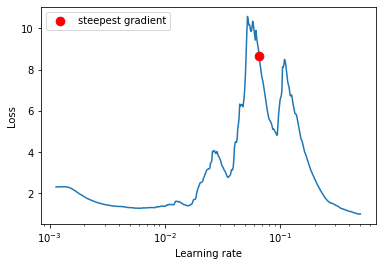

In [ ]:
max_lr = lr_finder_ls(start_lr,end_lr)
print(f"--------------------------------------Max LR Found:{max_lr}---------------------------------------")

In [ ]:
max_lr

0.4871927518542596

## model training

**The author advises the point at which the loss starts descending and the point at which the loss stops descending or becomes ragged for start_lr and end_lr**


So based on the above recommendaton:

- start_lr = 1e-2
- 0.4871927518542596

In [11]:
# %tb
# run_experiments()
start_lr = 1e-3
max_lr = 0.0172685370741483

Got all parser argument
================================================> Preparing data................
Files already downloaded and verified


/usr/local/lib/python3.7/dist-packages/albumentations/augmentations/transforms.py:691: FutureWarning: This class has been deprecated. Please use CoarseDropout
  FutureWarning,


Files already downloaded and verified
Files already downloaded and verified
===========================================================> Building model Custom resnet...............
CustomResNet(
  (prep_layer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layer1): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU()
  )
  (resblock1): BasicBlock(
    (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1),

Loss=1.607175588607788 Batch_id=97  LR=0.00216 Accuracy=30.80: 100%|██████████| 98/98 [01:00<00:00,  1.63it/s]
Loss=1.4958869218826294 Batch_id=19 LR=0.00216 Accuracy=47.36: 100%|██████████| 20/20 [00:04<00:00,  4.78it/s]


Saving..

Epoch: 1


Loss=1.4087854623794556 Batch_id=97  LR=0.00216 Accuracy=45.66: 100%|██████████| 98/98 [01:00<00:00,  1.63it/s]
Loss=1.2461179494857788 Batch_id=19 LR=0.00216 Accuracy=58.38: 100%|██████████| 20/20 [00:04<00:00,  4.82it/s]


Saving..

Epoch: 2


Loss=1.2925022840499878 Batch_id=97  LR=0.00216 Accuracy=51.82: 100%|██████████| 98/98 [00:59<00:00,  1.63it/s]
Loss=1.2216763496398926 Batch_id=19 LR=0.00216 Accuracy=58.94: 100%|██████████| 20/20 [00:04<00:00,  4.84it/s]


Saving..

Epoch: 3


Loss=1.1760814189910889 Batch_id=97  LR=0.00216 Accuracy=56.23: 100%|██████████| 98/98 [01:00<00:00,  1.62it/s]
Loss=1.0210446119308472 Batch_id=19 LR=0.00216 Accuracy=67.71: 100%|██████████| 20/20 [00:04<00:00,  4.80it/s]


Saving..

Epoch: 4


Loss=1.29587721824646 Batch_id=97  LR=0.00216 Accuracy=59.93: 100%|██████████| 98/98 [01:00<00:00,  1.63it/s]
Loss=0.852785050868988 Batch_id=19 LR=0.00216 Accuracy=70.70: 100%|██████████| 20/20 [00:04<00:00,  4.85it/s]


Saving..

Epoch: 5


Loss=1.036679983139038 Batch_id=97  LR=0.00216 Accuracy=62.26: 100%|██████████| 98/98 [01:00<00:00,  1.62it/s]
Loss=0.7964560985565186 Batch_id=19 LR=0.00216 Accuracy=71.55: 100%|██████████| 20/20 [00:04<00:00,  4.79it/s]


Saving..

Epoch: 6


Loss=0.9724606275558472 Batch_id=97  LR=0.00216 Accuracy=64.32: 100%|██████████| 98/98 [01:00<00:00,  1.62it/s]
Loss=0.7474799752235413 Batch_id=19 LR=0.00216 Accuracy=75.98: 100%|██████████| 20/20 [00:04<00:00,  4.84it/s]


Saving..

Epoch: 7


Loss=0.9888968467712402 Batch_id=97  LR=0.00217 Accuracy=66.88: 100%|██████████| 98/98 [01:00<00:00,  1.63it/s]
Loss=0.7183810472488403 Batch_id=19 LR=0.00217 Accuracy=76.38: 100%|██████████| 20/20 [00:04<00:00,  4.82it/s]


Saving..

Epoch: 8


Loss=0.8052689433097839 Batch_id=97  LR=0.00217 Accuracy=68.36: 100%|██████████| 98/98 [01:00<00:00,  1.61it/s]
Loss=0.6522917747497559 Batch_id=19 LR=0.00217 Accuracy=77.74: 100%|██████████| 20/20 [00:04<00:00,  4.81it/s]


Saving..

Epoch: 9


Loss=0.9143907427787781 Batch_id=97  LR=0.00217 Accuracy=69.53: 100%|██████████| 98/98 [01:00<00:00,  1.62it/s]
Loss=0.7182087302207947 Batch_id=19 LR=0.00217 Accuracy=77.75: 100%|██████████| 20/20 [00:04<00:00,  4.81it/s]


Saving..

Epoch: 10


Loss=0.7980740070343018 Batch_id=97  LR=0.00217 Accuracy=71.23: 100%|██████████| 98/98 [01:00<00:00,  1.61it/s]
Loss=0.5559743642807007 Batch_id=19 LR=0.00217 Accuracy=80.16: 100%|██████████| 20/20 [00:04<00:00,  4.83it/s]


Saving..

Epoch: 11


Loss=0.8583323359489441 Batch_id=97  LR=0.00218 Accuracy=72.01: 100%|██████████| 98/98 [01:00<00:00,  1.61it/s]
Loss=0.621654748916626 Batch_id=19 LR=0.00218 Accuracy=79.29: 100%|██████████| 20/20 [00:04<00:00,  4.78it/s]



Epoch: 12


Loss=0.8156084418296814 Batch_id=97  LR=0.00218 Accuracy=72.64: 100%|██████████| 98/98 [01:00<00:00,  1.62it/s]
Loss=0.5589568018913269 Batch_id=19 LR=0.00218 Accuracy=81.46: 100%|██████████| 20/20 [00:04<00:00,  4.77it/s]


Saving..

Epoch: 13


Loss=0.7604398727416992 Batch_id=97  LR=0.00218 Accuracy=73.87: 100%|██████████| 98/98 [01:00<00:00,  1.61it/s]
Loss=0.5113943815231323 Batch_id=19 LR=0.00218 Accuracy=81.81: 100%|██████████| 20/20 [00:04<00:00,  4.80it/s]


Saving..

Epoch: 14


Loss=0.7857725024223328 Batch_id=97  LR=0.00219 Accuracy=74.29: 100%|██████████| 98/98 [01:00<00:00,  1.61it/s]
Loss=0.4614700376987457 Batch_id=19 LR=0.00219 Accuracy=83.55: 100%|██████████| 20/20 [00:04<00:00,  4.79it/s]


Saving..

Epoch: 15


Loss=0.6025621891021729 Batch_id=97  LR=0.00219 Accuracy=75.81: 100%|██████████| 98/98 [01:01<00:00,  1.61it/s]
Loss=0.5472961068153381 Batch_id=19 LR=0.00219 Accuracy=82.54: 100%|██████████| 20/20 [00:04<00:00,  4.82it/s]



Epoch: 16


Loss=0.6544291377067566 Batch_id=97  LR=0.00220 Accuracy=76.48: 100%|██████████| 98/98 [01:00<00:00,  1.62it/s]
Loss=0.4824240207672119 Batch_id=19 LR=0.00220 Accuracy=83.90: 100%|██████████| 20/20 [00:04<00:00,  4.81it/s]


Saving..

Epoch: 17


Loss=0.6648873686790466 Batch_id=97  LR=0.00220 Accuracy=76.81: 100%|██████████| 98/98 [01:00<00:00,  1.62it/s]
Loss=0.49322953820228577 Batch_id=19 LR=0.00220 Accuracy=84.55: 100%|██████████| 20/20 [00:04<00:00,  4.83it/s]


Saving..

Epoch: 18


Loss=0.6717414259910583 Batch_id=97  LR=0.00221 Accuracy=76.95: 100%|██████████| 98/98 [01:00<00:00,  1.62it/s]
Loss=0.543090283870697 Batch_id=19 LR=0.00221 Accuracy=84.72: 100%|██████████| 20/20 [00:04<00:00,  4.82it/s]


Saving..

Epoch: 19


Loss=0.5539961457252502 Batch_id=97  LR=0.00221 Accuracy=77.66: 100%|██████████| 98/98 [01:00<00:00,  1.62it/s]
Loss=0.5275910496711731 Batch_id=19 LR=0.00221 Accuracy=83.64: 100%|██████████| 20/20 [00:04<00:00,  4.83it/s]



Epoch: 20


Loss=0.5808655619621277 Batch_id=97  LR=0.00222 Accuracy=77.99: 100%|██████████| 98/98 [01:00<00:00,  1.61it/s]
Loss=0.4874759018421173 Batch_id=19 LR=0.00222 Accuracy=84.70: 100%|██████████| 20/20 [00:04<00:00,  4.83it/s]



Epoch: 21


Loss=0.570476770401001 Batch_id=97  LR=0.00223 Accuracy=79.20: 100%|██████████| 98/98 [01:00<00:00,  1.62it/s]
Loss=0.5122485160827637 Batch_id=19 LR=0.00223 Accuracy=85.99: 100%|██████████| 20/20 [00:04<00:00,  4.81it/s]


Saving..

Epoch: 22


Loss=0.5433886051177979 Batch_id=97  LR=0.00223 Accuracy=79.35: 100%|██████████| 98/98 [01:00<00:00,  1.63it/s]
Loss=0.47292545437812805 Batch_id=19 LR=0.00223 Accuracy=84.54: 100%|██████████| 20/20 [00:04<00:00,  4.84it/s]



Epoch: 23


Loss=0.5610058903694153 Batch_id=97  LR=0.00224 Accuracy=79.85: 100%|██████████| 98/98 [01:00<00:00,  1.61it/s]
Loss=0.4406554400920868 Batch_id=19 LR=0.00224 Accuracy=85.96: 100%|██████████| 20/20 [00:04<00:00,  4.84it/s]


============================================================ Training and Testing Performance ================================


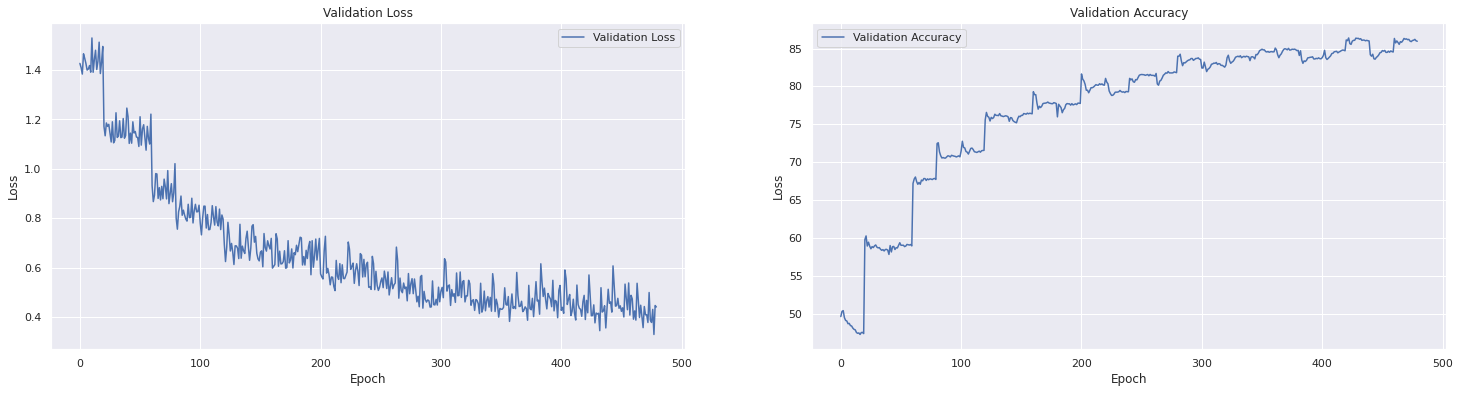

============================================================= Class Level Accuracy ==========================================
Accuracy of airplane : 85 %
Accuracy of automobile : 100 %
Accuracy of  bird : 100 %
Accuracy of   cat : 66 %
Accuracy of  deer : 100 %
Accuracy of   dog : 66 %
Accuracy of  frog : 72 %
Accuracy of horse : 100 %
Accuracy of  ship : 91 %
Accuracy of truck : 100 %
============================================== Random Misclassified Images ==================================================


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Total wrong predictions are 1404


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


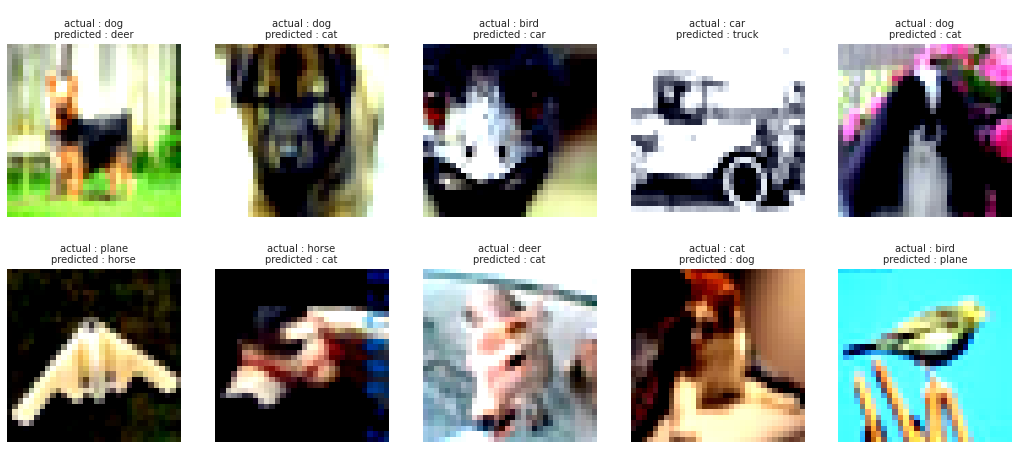

============================================== Grdadcam Misclassified Images ==================================================


NameError: ignored

In [14]:
# %tb
run_experiments_custom_resnet(start_lr = start_lr, lrmax = max_lr)